In [65]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import gsw
import cmocean.cm as cmo
#import cf_xarray as cfxr
import xarray as xr
from skimage.morphology import dilation
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from skimage.morphology import disk
import datetime
xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [6]:
dswp16=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/wp_dcreg_2016_tpre02_prsn02_2012.nc')
dswp17=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/wp_dcreg_2017_tpre02_prsn02_2012.nc')
dsm=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/mld_201[6,7].nc')
dsm.coords['year']=dsm.time_counter.dt.year
dsm=dsm.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
dshi=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/hi800_prepolynya_tpre02_prsn02_2012_201*.nc')
dshi=dshi.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})
dssa=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/*100_saltadv_tpre02_prsn02_2012.nc')
dscr=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/cr800_prepolynya_tpre02_prsn02_2012_201*.nc')
dscr=dscr.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})

In [57]:
bat=xr.open_dataset('/home/birte/MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')
bat.coords['lon']=bat.nav_lon
bat.coords['lat']=bat.nav_lat
bat['mask_tc']=np.zeros((len(bat.y),len(bat.x)))*(bat.bathy_meter.where(bat.bathy_meter<2500))+1
bat['mask_tc']=bat.mask_tc.where(((bat.mask_tc==1)&(bat.glamt<4.3)&(bat.glamt>0.5)&(bat.gphit>-65.5)),other=0)
mask_tc=bat.mask_tc
mask_tc.load()
mask_tc[173,98]=1
mask_tc[178,109]=0

bat['mask_tc']=mask_tc

mean_bathy = bat.bathy_meter.rolling(x=13,center=True).mean().rolling(y=13,center=True).mean()
bat['mask_tr_all']=np.zeros((len(bat.y),len(bat.x)))*(mean_bathy.where(mean_bathy<3500))+1
bat['mask_tr_all']=bat.mask_tr_all.where(((bat.mask_tr_all==1)&(bat.glamt<8)&(bat.gphit>-66.5)),other=0)
bat['mask_tr']=bat.mask_tr_all-bat.mask_tc

mask_tr=bat.mask_tr


bat['mask_ha'] = xr.DataArray(dilation(bat.mask_tr_all, disk(14)) - bat.mask_tr_all,dims=('y', 'x'))
bat['mask_ha']=bat.mask_ha.where(((bat.mask_ha==1)&(bat.bathy_meter<5000)),other=0)
bat['mask_ha_all'] = bat.mask_ha+bat.mask_tr_all
bat['mask_hatr'] = bat.mask_ha+bat.mask_tr
mask_ha=bat.mask_ha
mask_ha=mask_ha.rename("mask_ha")

In [11]:
time_array16=np.array(dswp16.time_counter,dtype=np.datetime64)
time_array17=np.array(dswp17.time_counter,dtype=np.datetime64)

In [12]:
years=[2016,2017]
minor_ticks = []
for y in years:
    minor_ticks += [datetime.datetime(y,m,1) for m in range(1,13)]

In [13]:
dshi.hi.where(dshi.year==2017).mean(dim='t').min().values

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(-0.23259402)

/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/da

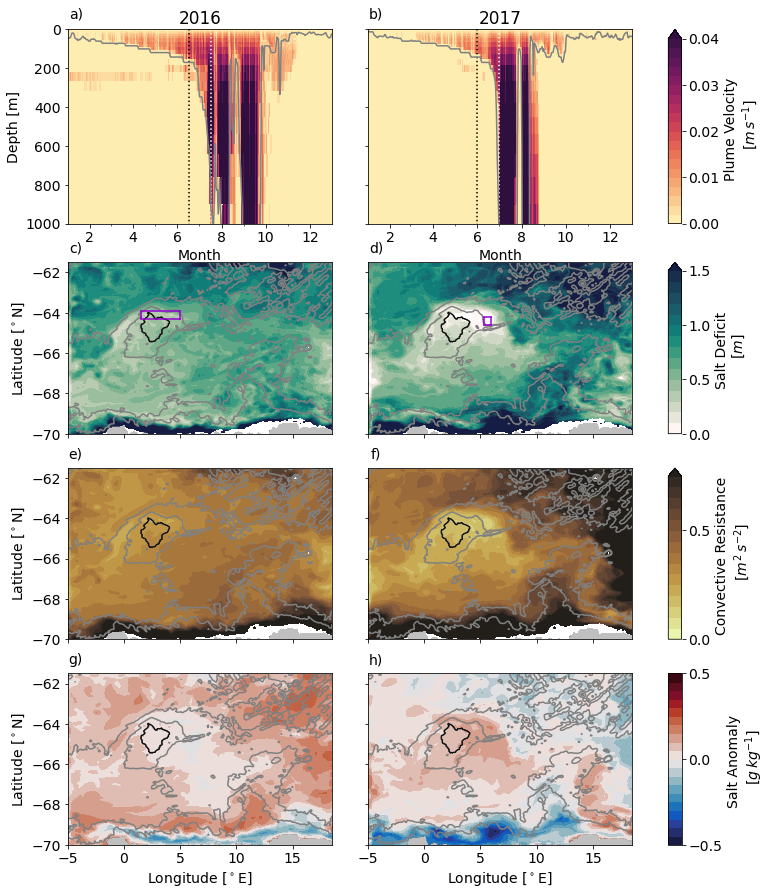

In [110]:
fig = plt.figure(figsize=(11,15))
gs = GridSpec(2,1, hspace=.1, height_ratios=[1,3])#,hspace=.1)#,wspace=0.3)

gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0], width_ratios=[1,1,0.05])
gs2 = GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[1], width_ratios=[1,1,0.05])

ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
c_ax1 = fig.add_subplot(gs1[2])
ax3 = fig.add_subplot(gs2[0,0])
ax4 = fig.add_subplot(gs2[0,1])
c_ax2 = fig.add_subplot(gs2[0,2])
ax5 = fig.add_subplot(gs2[1,0])
ax6 = fig.add_subplot(gs2[1,1])
c_ax3 = fig.add_subplot(gs2[1,2])
ax7 = fig.add_subplot(gs2[2,0])
ax8 = fig.add_subplot(gs2[2,1])
c_ax4 = fig.add_subplot(gs2[2,2])



# plume velocity
ax=ax1
cwp=dswp16.mf_wp.max(dim={'x','y'}).plot.pcolormesh(x='time_counter',y='depthw',ax=ax,cmap=cmo.matter,vmin=0., vmax=.04,levels=21, add_colorbar=False)
dsm.mldr10_1.where((dsm.nav_lon>1.5)&(dsm.nav_lon<5)&(dsm.nav_lat<-63.9)&(dsm.nav_lat>-64.3)).max(dim={'x','y'}).plot(x="time_counter",color='grey',ax=ax)
ax.set_ylim(1000,0)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Month')
ax.set_title('2016')
ax.vlines(x=time_array16[198-dt],ymin=0,ymax=1000,color='k',ls=':')
ax.vlines(x=time_array16[198],ymin=0,ymax=1000,color='w',ls=':')
ax.set_xticks([datetime.datetime(2016,m,1) for m in range(1,13)], minor=True);
ax.set_xticks([datetime.datetime(2016,m,1) for m in range(2,13,2)])
ax.set_xticklabels(np.arange(2,13,2))

plt.setp(ax.get_xticklabels(), ha="center", rotation=0)

ax.set_xlim(time_array16[0],time_array16[-1])
ax.text(0.03, 1.08, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')
ax=ax2
dswp17.mf_wp.max(dim={'x','y'}).plot.pcolormesh(x='time_counter',y='depthw',ax=ax,cmap=cmo.matter,vmin=0., vmax=.04,levels=21, add_colorbar=False)
dsm.mldr10_1.where((dsm.nav_lon>5.3)&(dsm.nav_lon<5.9)&(dsm.nav_lat<-64.2)&(dsm.nav_lat>-64.6)).max(dim={'x','y'}).plot(x="time_counter",color='grey',ax=ax)
ax.set_ylim(1000,0)
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xlabel('Month')
ax.set_title('2017')

ax.vlines(x=time_array17[180],ymin=0,ymax=1000,color='w',ls=':')
ax.vlines(x=time_array17[180-dt],ymin=0,ymax=1000,color='k',ls=':')
ax.set_xticks([datetime.datetime(2017,m,1) for m in range(1,13)], minor=True);
ax.set_xticks([datetime.datetime(2017,m,1) for m  in range(2,13,2)])
ax.set_xticklabels(np.arange(2,13,2))
ax.set_xlim(time_array17[0],time_array17[-1])
plt.setp(ax.get_xticklabels(), ha="center", rotation=0)
ax.text(0.03, 1.08, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')
plt.colorbar(cwp,cax=c_ax1,label='Plume Velocity \n [$m\,s^{-1}$]',ticks=np.linspace(0,0.04,5))



# salt deficit
ax=ax3
dshi.hi.where(dshi.year==2016).mean(dim='t').plot.contourf(x="nav_lon",y="nav_lat",vmin=0,vmax=1.5, levels=16,ax=ax, cmap=cmo.tempo,add_colorbar=False)
bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.5)
bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='k',linestyles='-',linewidths=.7,alpha=.5)
ax.set_xlim(-5,18.5)
ax.set_ylim(-70,-61.5)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylabel('Latitude [$^\circ$N]')
# add box of mean
ax.plot((1.5,1.5),(-64.3,-63.9),color='darkviolet')
ax.plot((5,5),(-64.3,-63.9),color='darkviolet')
ax.plot((1.5,5),(-63.9,-63.9),color='darkviolet')
ax.plot((1.5,5),(-64.3,-64.3),color='darkviolet')
ax.text(0.03, 1.08, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax4
chi=dshi.hi.where(dshi.year==2017).mean(dim='t').where(dshi.hi.where(dshi.year==2017).mean(dim='t')>0).plot.contourf(x="nav_lon",y="nav_lat",vmin=0,vmax=1.5, levels=16,cmap=cmo.tempo,ax=ax , add_colorbar=False)
bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.5)
bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='k',linestyles='-',linewidths=.7,alpha=.5)
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.set_xlim(-5,18.5)
ax.set_ylim(-70,-61.5)
ax.set_xlabel('')
ax.plot((5.3,5.3),(-64.6,-64.2),color='darkviolet')
ax.plot((5.9,5.9),(-64.6,-64.2),color='darkviolet')
ax.plot((5.3,5.9),(-64.2,-64.2),color='darkviolet')
ax.plot((5.3,5.9),(-64.6,-64.6),color='darkviolet')

plt.colorbar(chi,cax=c_ax2,label='Salt Deficit \n [$m$]',ticks=np.linspace(0,1.5,4))
ax.text(0.03, 1.08, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

# convective resistance
ax=ax5
dscr.CR.where(dscr.year==2016).mean(dim='t').where(dscr.CR.where(dscr.year==2016).mean(dim='t')>0).plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=0,vmax=.75, levels=16,cmap=cmo.turbid,add_colorbar=False)
bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.5)
bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='k',linestyles='-',linewidths=.7,alpha=.5)

ax.set_xlim(-5,18.5)
ax.set_ylim(-70,-61.5)
ax.set_xlabel('')
ax.set_ylabel('Latitude [$^\circ$N]')
ax.set_xticklabels('')


ax.text(0.03, 1.08, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax6
chcr=dscr.CR.where(dscr.year==2017).mean(dim='t').where(dscr.CR.where(dscr.year==2017).mean(dim='t')>0).plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=0,vmax=.75, levels=16,cmap=cmo.turbid, add_colorbar=False)
bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.5)
bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='k',linestyles='-',linewidths=.7,alpha=.5)
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.set_xlim(-5,18.5)
ax.set_ylim(-70,-61.5)
ax.set_xlabel('')
plt.colorbar(chcr,cax=c_ax3,label='Convective Resistance \n [$m^2\,s^{-2}$]',ticks=np.linspace(0,1,3))
ax.text(0.03, 1.08, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')


#salt anomaly 
ax=ax7
ar=10
dssa.sa_100.where(dssa.year==2016,drop=True).isel(t=slice(198-dt,198)).mean(dim={'t'}).plot.contourf(ax=ax,x="nav_lon_grid_T",y="nav_lat_grid_T",levels=21,vmin=-0.5,vmax=0.5,cmap=cmo.balance,add_colorbar=False)
bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.5)
bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='k',linestyles='-',linewidths=.7,alpha=.5)
ax.set_ylabel('Latitude [$^\circ$N]')
ax.set_xlabel('Longitude [$^\circ$E]')
ax.set_xlim(-5,18.5)
ax.set_ylim(-70,-61.5)
ax.text(0.03, 1.08, 'g)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax8
csa=dssa.sa_100.where(dssa.year==2017,drop=True).isel(t=slice(180-dt,180)).mean(dim={'t'}).plot.contourf(ax=ax,x="nav_lon_grid_T",y="nav_lat_grid_T",levels=21,vmin=-.5,vmax=0.5,cmap=cmo.balance,add_colorbar=False)
bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.5)
bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax)
bat.mask_tc.plot.contour(x="lon",y="lat",ax=ax,colors='k',linestyles='-',linewidths=.7,alpha=.5)

ax.set_ylabel('')
ax.set_xlabel('Longitude [$^\circ$E]')
ax.set_xlim(-5,18.5)
ax.set_ylim(-70,-61.5)
ax.set_yticklabels('')
plt.colorbar(csa,cax=c_ax4,label='Salt Anomaly \n [$g\,kg^{-1}$]',ticks=np.linspace(-.5,.5,3))

ax.text(0.03, 1.08, 'h)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')


plt.tight_layout()
plt.savefig('./processes_polynya.jpg',dpi=300)